# ランダムフォレスト回帰（特徴量：ALL）の学習→予測→評価

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install pandas==1.5.3
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2
# !pip install lightgbm==3.3.5
# !pip install shap==0.41.0

In [4]:
# ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# バージョンの確認
import matplotlib
import sklearn
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(graphviz.__version__)
print(sklearn.__version__)

2.0.3
1.25.2
3.7.1
0.20.3
1.2.2


In [6]:
# データセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

In [7]:
# 特徴量と目的変数の設定
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [8]:
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print('X_trainの形状：', X_train.shape, ' y_trainの形状：', y_train.shape, ' X_testの形状：', X_test.shape, ' y_testの形状：', y_test.shape)

X_trainの形状： (404, 13)  y_trainの形状： (404,)  X_testの形状： (102, 13)  y_testの形状： (102,)


In [9]:
 # モデルの学習
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(bootstrap=True, n_estimators=50, criterion='squared_error', max_depth=4, min_samples_leaf=10, ccp_alpha=5, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 5,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [10]:
# テストデータの予測と評価
y_test_pred = model.predict(X_test)
print('RMSE test: %.2f' % (mean_squared_error(y_test, y_test_pred) ** 0.5))

RMSE test: 5.38


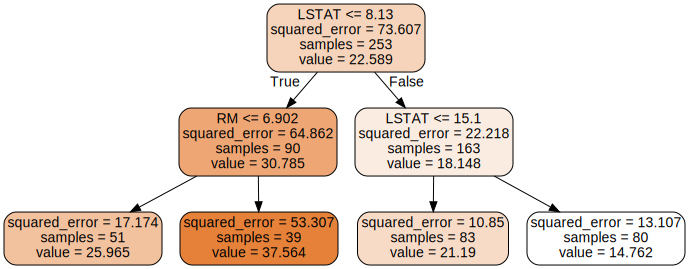

In [11]:
# 木の可視化
import graphviz
from sklearn import tree

# ランダムフォレスト最初の木の可視化
dot_data = tree.export_graphviz(model.estimators_[0], out_file=None, rounded=True, feature_names=X.columns, filled=True)
graphviz.Source(dot_data, format='png')

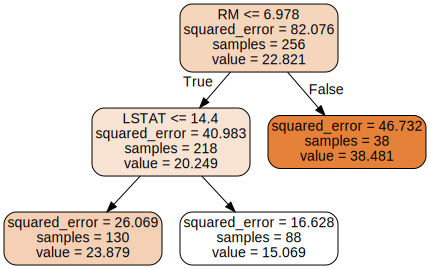

In [12]:
# ランダムフォレスト最後の木の可視化
dot_data = tree.export_graphviz(model.estimators_[-1], out_file=None, rounded=True, feature_names=X.columns, filled=True)
graphviz.Source(dot_data, format='png')

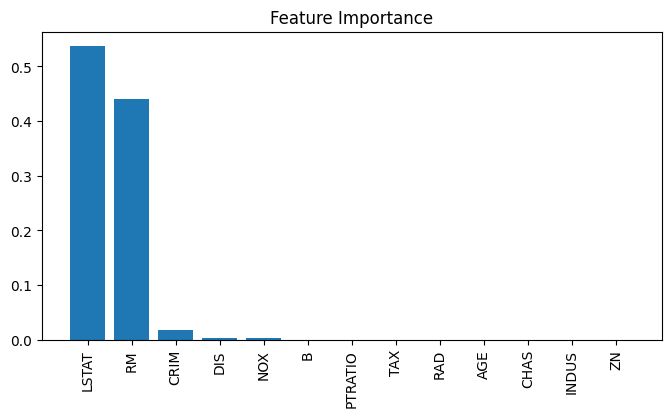

In [13]:
# 特徴量重要度を計算
importances = model.feature_importances_

# 特徴量重要度を降順にソート
indices = np.argsort(importances)[::-1]

# プロットの作成
plt.figure(figsize=(8, 4)) #プロットのサイズ指定
plt.title("Feature Importance")
# 特徴量の重要度と名前をソートした順に並び替え
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)

plt.show()